There are good reasons to be selective, throwing in every possible feature is not a good idea! In general, for the best prediction model, careful selection of the fewest features that provide the most amount of information is the best practice.

Here's why:

- more variables result in more complicated workflows that require more professional time and have increased opportunity for blunders
- higher dimensional feature sets are more difficult to visualize
- more complicated models may be more difficult to interrogate, interpret and QC
- inclusion of highly redundant and colinear variables increases model instability and decreases prediction accuracy in testing
- more variables generally increase the computational time required to train the model and the model may be less compact and portable
the risk of overfit increases with the more variables, more complexit

In [93]:
# find the previos code  ranking

In [1]:
import sys 
from keyvars import ufiles_path
sys.path.append(ufiles_path)

import uvars
import uviz
import uprocessing as up 
import utransform as ut 
import os 
from glob import  glob
import rasterio
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
parqts = uvars.parqts
df = pd.read_parquet(parqts[1])

In [2]:
parqts = uvars.parqts
df = pd.read_parquet(parqts[1])

In [3]:
df.head()

,x,y,cop,edem,pband,s1,tdemx,wc,wc_ffth,wc_gau,wc_sobelm,wc_sobelh,wc_sobelv
0,-63.000000,-0.483556,51.662418,51.249901,34.285534,-7.934625,45.090183,10.0,27.539992,10.0,0.0,0.0,0.0
1,-62.999888,-0.483556,52.067356,51.564186,34.355370,-7.881948,44.067894,10.0,25.123527,10.0,0.0,0.0,0.0
2,-62.999777,-0.483556,52.396496,51.968712,34.632790,-7.805929,44.640427,10.0,22.747256,10.0,0.0,0.0,0.0
3,-62.999665,-0.483556,52.542191,52.327309,34.950935,-7.758332,45.728882,10.0,20.428785,10.0,0.0,0.0,0.0
4,-62.999554,-0.483556,52.421185,52.528709,35.227257,-7.772036,46.259583,10.0,18.233940,10.0,0.0,0.0,0.0


In [4]:
# from conditional stats tdemx:sel@ cop,edem, and wc as most informative

In [5]:
fcols = ['cop', 'edem', 'pband', 's1', 'tdemx', 'wc', 'wc_ffth',
       'wc_gau', 'wc_sobelm', 'wc_sobelh', 'wc_sobelv']

R1: Summary Stats

In [99]:
df[fcols].describe().T

,count,mean,std,min,25%,50%,75%,max
cop,65536.0,42.360731,8.608852,25.381269,36.275472,43.432117,49.847439,57.758488
edem,65536.0,42.336092,8.597831,24.237734,36.247367,43.394871,49.826604,57.752518
pband,65536.0,31.020042,2.789703,27.165571,28.724078,29.616702,33.991473,37.919109
s1,65536.0,-8.085797,1.044923,-16.553356,-8.331324,-7.949359,-7.590429,-4.531119
tdemx,65536.0,36.893582,8.748812,13.013600,30.922582,38.026159,44.299040,55.514832
wc,65536.0,19.173584,24.158514,10.000000,10.000000,10.000000,10.000000,90.000000
wc_ffth,65536.0,19.173584,17.490760,9.904944,9.999958,10.003173,19.319900,90.108572
wc_gau,65536.0,19.173584,22.621426,10.000000,10.000000,10.000000,10.207663,90.000000
wc_sobelm,65536.0,16.810764,58.954941,0.000000,0.000000,0.000000,0.000000,357.770874
wc_sobelh,65536.0,0.284424,49.356289,-320.000000,0.000000,0.000000,0.000000,320.000000


R2 : Univariate Distribution

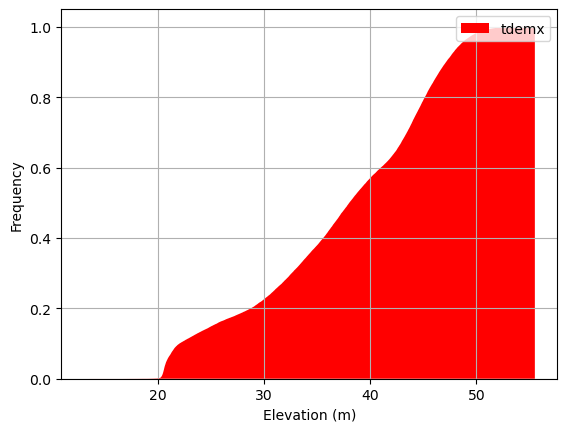

In [100]:
uviz.plot_udistribution(df['tdemx'], 'tdemx','Elevation (m)','Frequency')

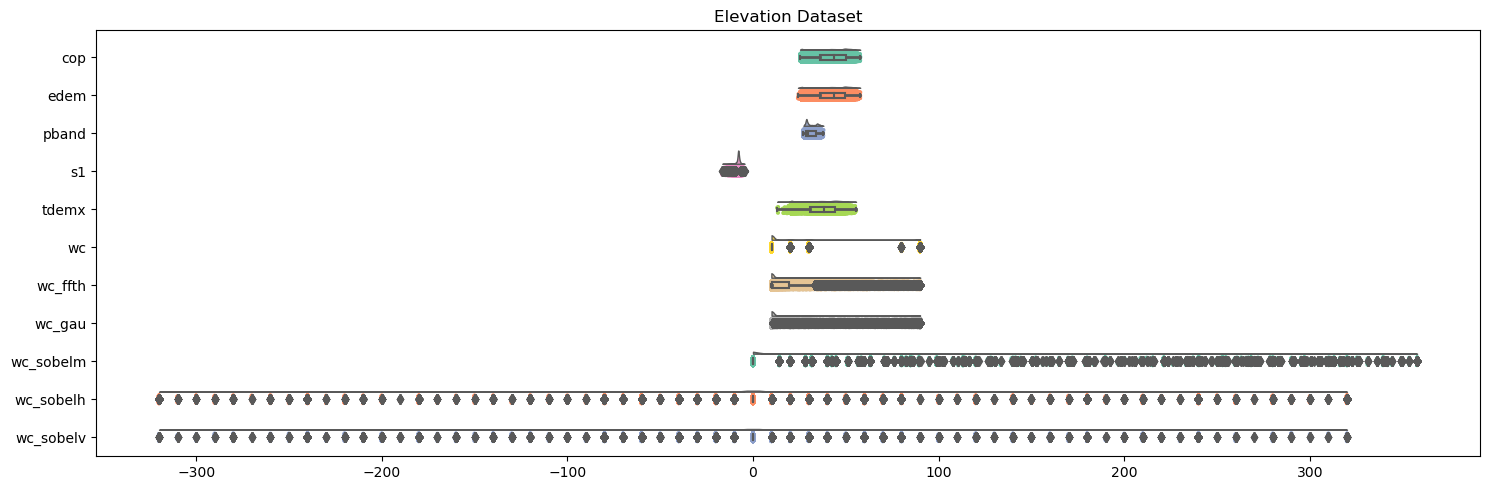

In [101]:
uviz.plot_raincloud(df[fcols], 'Dataset',(15,5),None)

In [102]:
fcols_2 = ['cop','edem','pband','s1','tdemx','wc_ffth','wc_gau']
fcols_3 = ['cop','edem','pband','s1','tdemx']

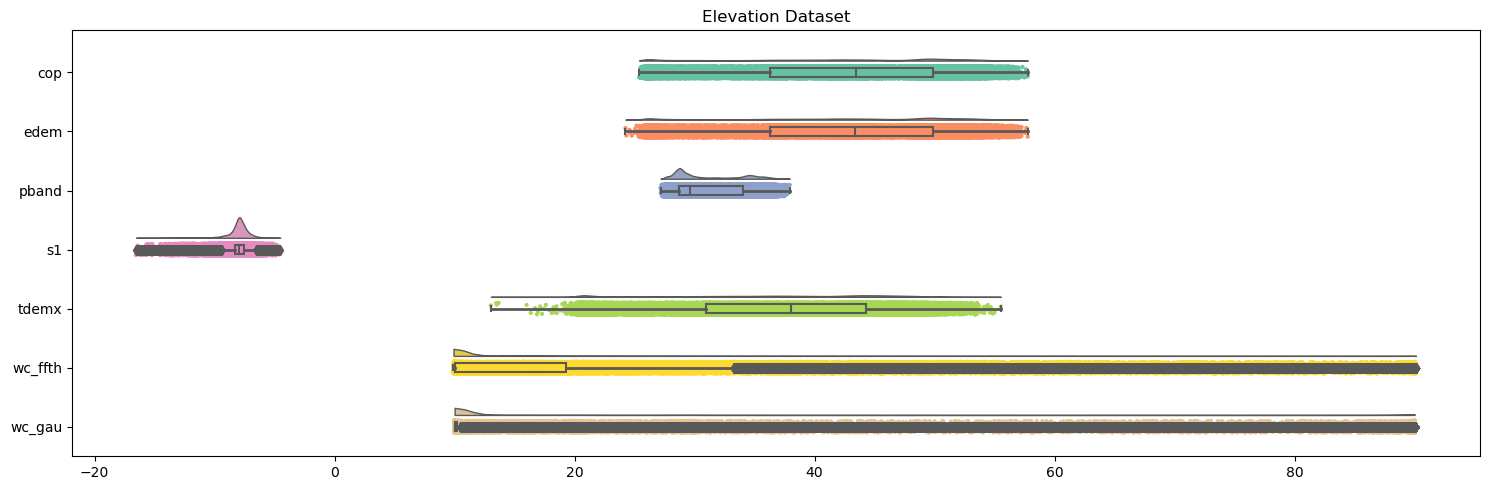

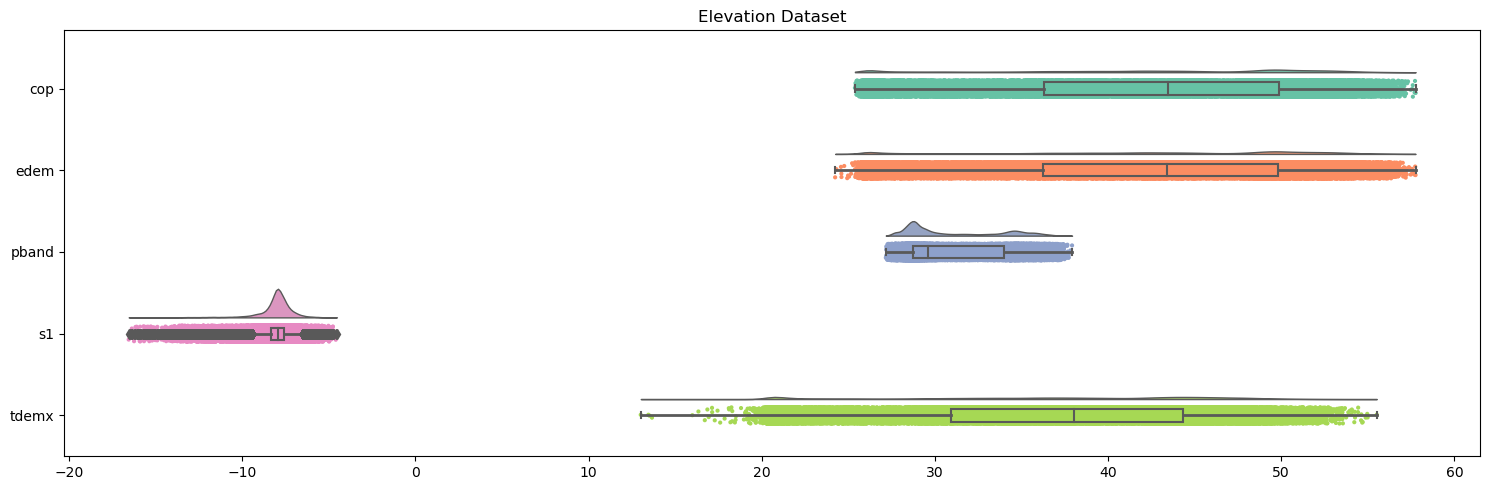

In [103]:
uviz.plot_raincloud(df[fcols_2], 'Dataset',(15,5),None)
uviz.plot_raincloud(df[fcols_3], 'Dataset',(15,5),None)

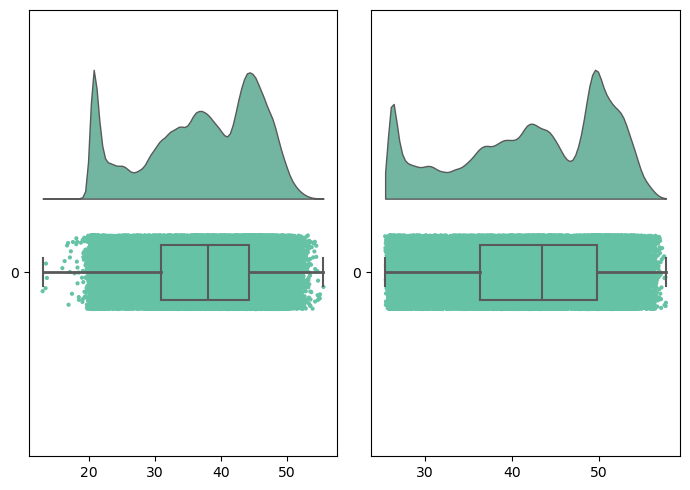

In [104]:
uviz.plot_raincloud_pair(df,'tdemx','cop', None) # add another function plots up to n

In [105]:
# data not normal,multi-model some outliers

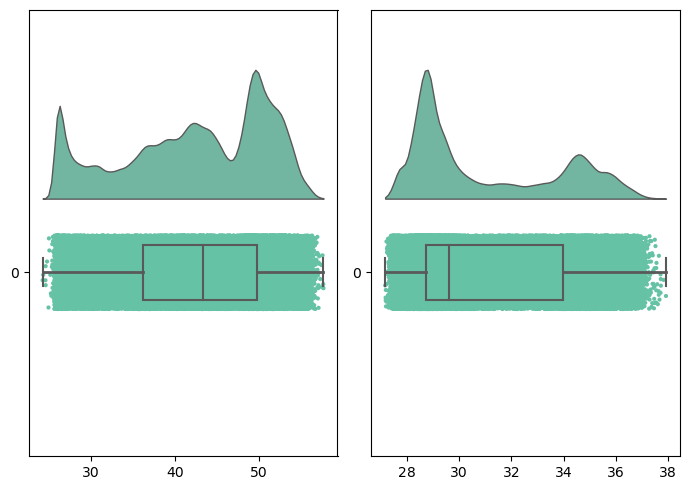

In [106]:
uviz.plot_raincloud_pair(df,'edem','pband', None)

In [107]:
# data not normal,multi-model some outliers

# is the multi-modality error or feature?

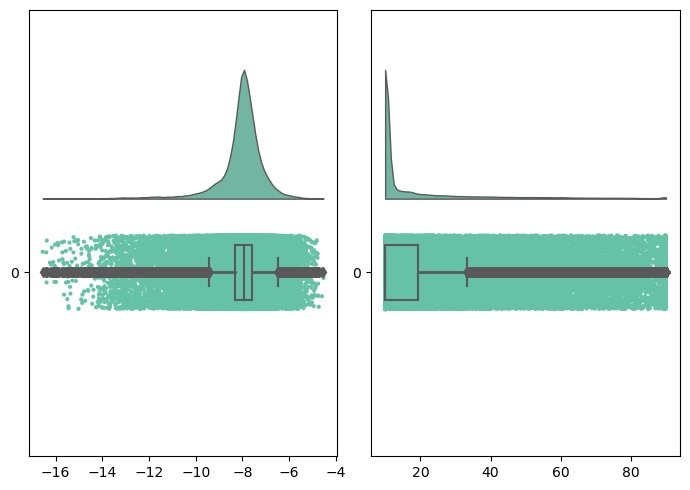

In [108]:
uviz.plot_raincloud_pair(df,'s1','wc_ffth', None)

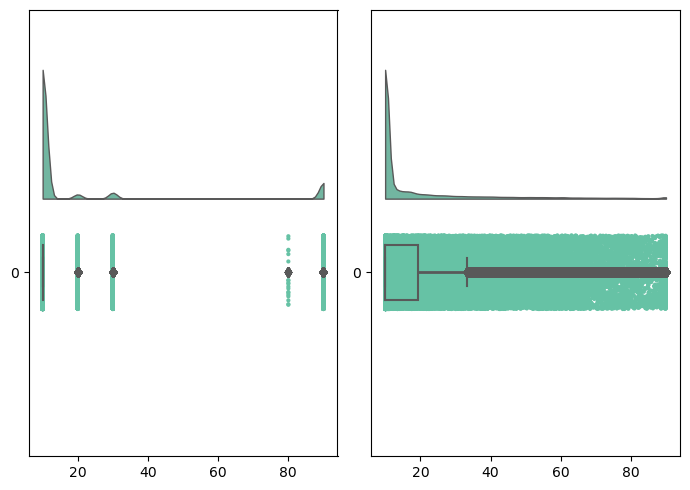

In [109]:
uviz.plot_raincloud_pair(df,'wc','wc_ffth', None)

In [110]:
# very skewed dist. 

In [111]:
# the distributions for GDSMs look very similar agreeing with condi.stats
# others are more different, including pband 
# how to use one distribution to predict another @@samples


R3: Bivariate Dist 

In [112]:
# from eda
tcol = 'tdemx'
import seaborn as sns

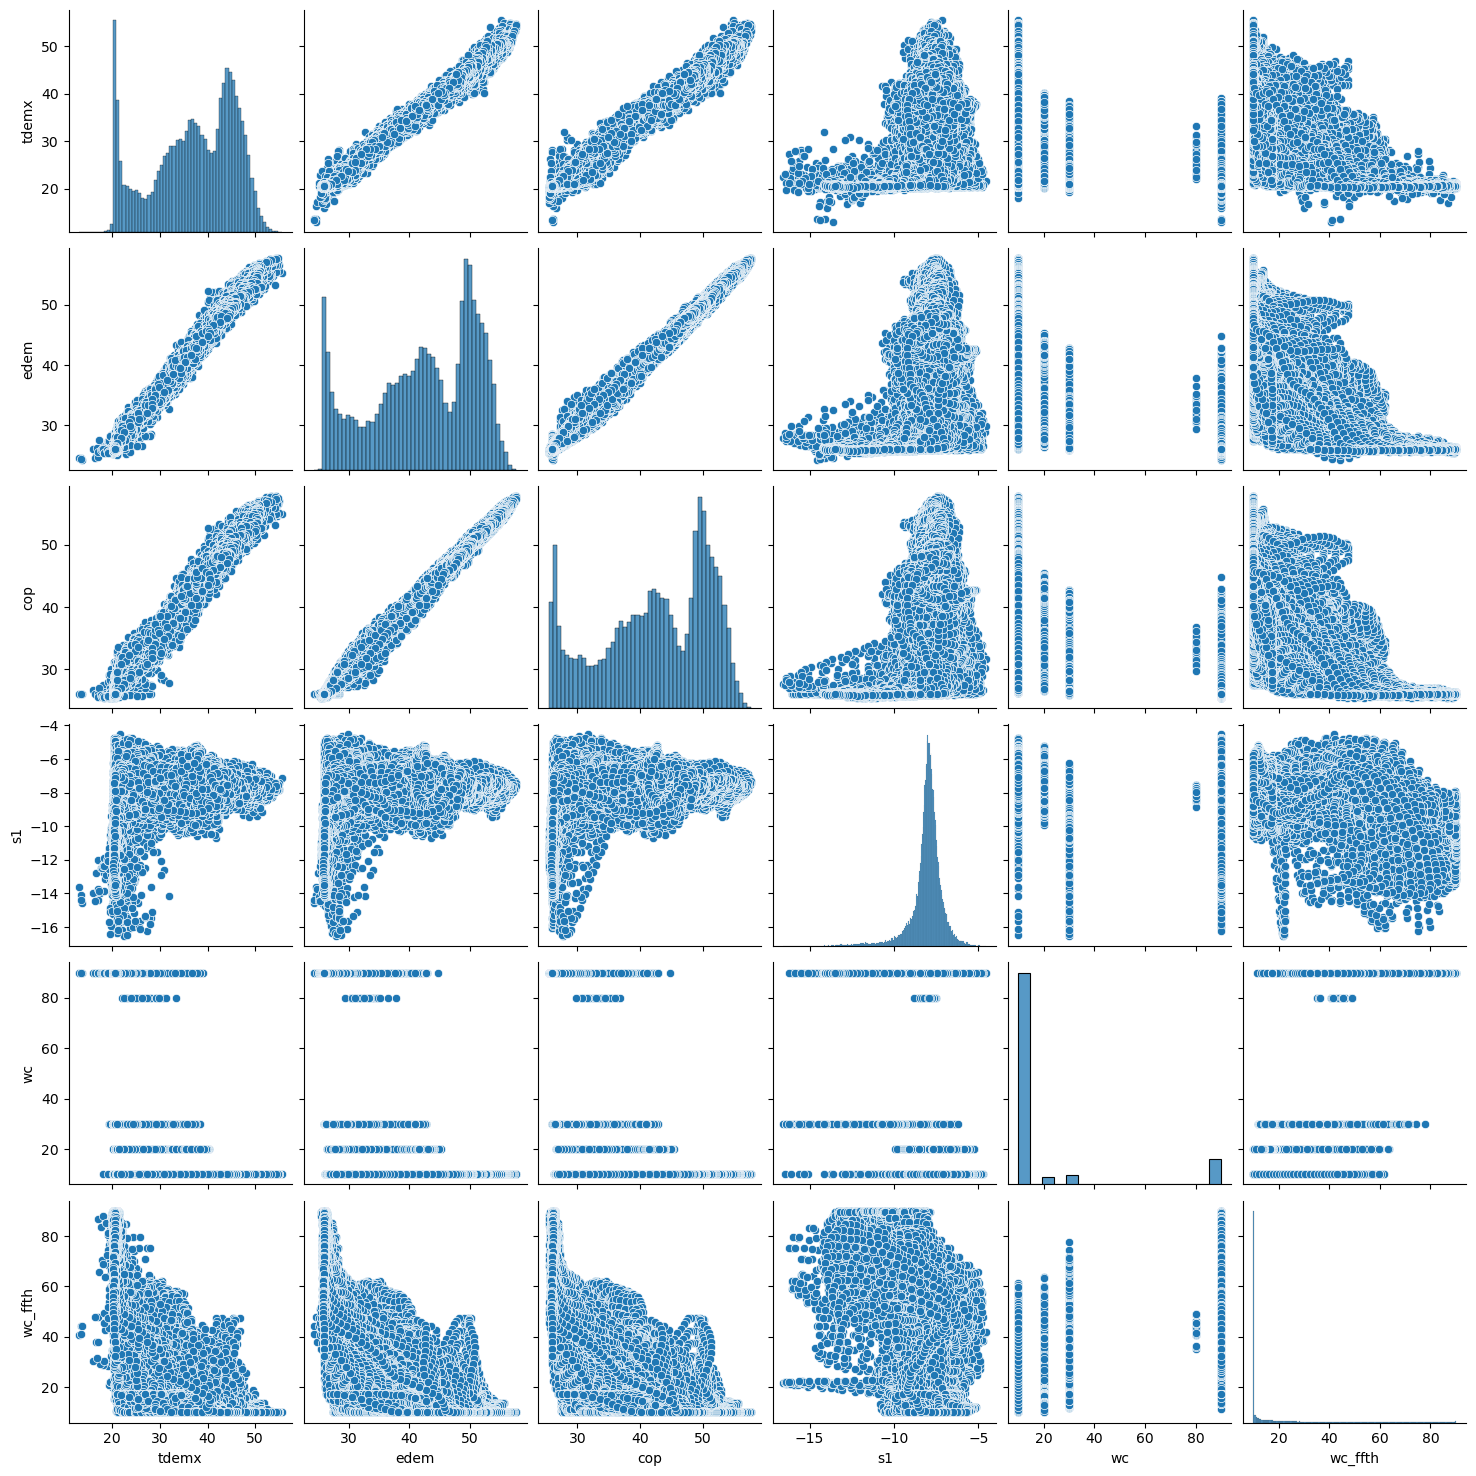

In [113]:
sns.pairplot(df,vars=['tdemx','edem','cop','s1','wc','wc_ffth'], markers='o')
plt.show()

This plot communicates a lot of information. How could we use this plot for variable ranking?


we can identify variables that are closely related to eachother. e.g. if two variables have almost a perfect monotonic linear or near linear relationship we should remove one immediately. This is a simple case of colinearity that will likley result in model instability as discussed above.

we can check for linear vs. non-linear relationships. If we observe nonlinear bivariate relationships this will impact the choice of methods, and the quality of results from methods that assume linear relationships for variable ranking.

we can identify constraint relationships and heteroscedasticity between variables. Once again these may restrict our ranking methods and also encourage us to retains specific features to retain these features in the resulting model.

Yet, we must remember that bivariate visualization and analysis is not sufficient to understand all the multivariate relationships in the data. Multicollinearity includes strong linear relationships between 2 or more features. These may be hard to see with only bivariate plots.

R4: Pairwise Covariance

In [114]:
tindex = 4

In [115]:
r1_cova = df.iloc[:,2:].corr()
#cova.iloc[:,tindex].sort_values(ascending=True).plot.barh()
r1_cova = r1_cova.iloc[:,tindex].values
r1_cova

array([ 0.99098755,  0.99456849,  0.75460962,  0.3895968 ,  1.        ,
       -0.60650869, -0.71698702, -0.6437286 , -0.35913187, -0.01729226,
        0.01494971])

R5: Pairwise correlation coefiecient

In [116]:
r2_core = df.iloc[:,2:].corr()
#core.iloc[:,tindex].sort_values(ascending=True).plot.barh()
r2_core = r2_core.iloc[:,tindex].values
r2_core

array([ 0.99098755,  0.99456849,  0.75460962,  0.3895968 ,  1.        ,
       -0.60650869, -0.71698702, -0.6437286 , -0.35913187, -0.01729226,
        0.01494971])

In [117]:
# not all have linear relationship - really only cond.stat up vara apply

R6: Paisewise Spearman

In [118]:
import scipy.signal as signal
from scipy import stats    
import math 
import random 
from scipy import linalg
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
import ustats

In [119]:
r3_spearnman_corr, spearnman_pval = stats.spearmanr(df[fcols])
r3_spearnman_corr, spearnman_pval = r3_spearnman_corr[:,tindex][:], spearnman_pval[:,tindex][:]
#scorr,spval

In [120]:
r4_partial_corr = ustats.partial_corr(df[fcols])
r4_partial_corr = r4_partial_corr[:,tindex][:]
dp = pd.DataFrame()
dp['names'] = fcols
dp['parcorr'] = r4_partial_corr
dp.index = dp.names

#dp.plot.barh()

In [121]:
r5_semipartial_corr = ustats.semipartial_corr(df[fcols])
r5_semipartial_corr = r5_semipartial_corr[:,tindex][:]
dp = pd.DataFrame()
dp['names'] = fcols
dp['semiparcor'] = r5_semipartial_corr
dp.index = dp.names

#dp.plot.barh()


In [122]:
# all but wc and its detivatives #pband and s1 helping here 

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [124]:
r6_vif_data = pd.DataFrame()
dependent_variable  = tcol
independent_variables  = df[fcols]
r6_vif_data["Variable"]  = fcols
r6_vif_data["VIF"] = [variance_inflation_factor(independent_variables.values, 
                        i) for i in range(independent_variables.shape[1])]
#vif_data = vif_data.sort_values('VIF', ascending=False)
r6_vif = r6_vif_data.VIF.values
r6_vif_data

,Variable,VIF
0,cop,5440.104143
1,edem,8965.511690
2,pband,304.817519
3,s1,78.973668
4,tdemx,1604.495573
5,wc,33.798197
6,wc_ffth,14.845777
7,wc_gau,52.653615
8,wc_sobelm,1.299827
9,wc_sobelh,1.084024


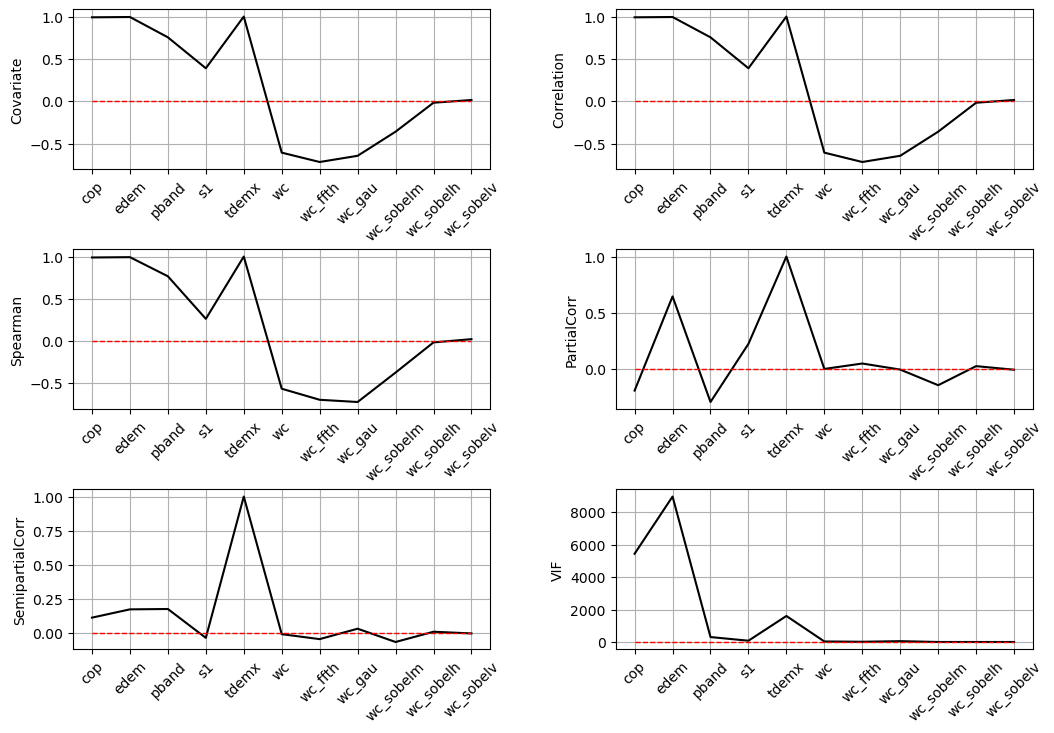

In [125]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming fcols, zeros, rlist, and rname are defined as in your code

# Set the number of columns for subplots
num_columns = 2

# Calculate the number of rows needed
num_rows = len(rlist) // num_columns
if len(rlist) % num_columns != 0:
    num_rows += 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 8)) #facecolor='lightgray'

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate through the data and plot each set
for i, (data, name) in enumerate(zip(rlist, rname)):
    row = i // num_columns
    col = i % num_columns

    # Plot the data
    axes[i].plot(fcols, data, color='black')
    axes[i].plot(zeros, '--', color='red', linewidth=1.0)
    axes[i].grid(True)
    #axes[i].set_xlabel('Predictor Features')
    axes[i].set_ylabel(name)
    #axes[i].set_title(name)
    axes[i].tick_params(axis='x', rotation=45)#90  # Rotate x-axis tick labels by 90 degrees

# Adjust layout to prevent overlapping subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.5)

# Show the plot
plt.show()



In [126]:
# add random and keep tdemx as control variables 

In [127]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python  

In [128]:
fcolx = ['cop','edem','pband','s1','wc','wc_ffth','wc_gau','wc_sobelm','wc_sobelh','wc_sobelv']
tcolx = 'tdemx'

In [129]:
amin, amax = 0.0, 1.0
da = pd.DataFrame()
da[tcolx] = df[tcolx].values
for fcol in fcolx:da[fcol] = GSLIB.affine(df[fcol].values, amin, amax)

dn = pd.DataFrame()
dn[tcolx] = df[tcolx].values
for fcol in fcolx:
    dn[fcol],_,_ = geostats.nscore(df, fcol)

In [130]:
da.describe().T

,count,mean,std,min,25%,50%,75%,max
tdemx,65536.0,3.689358e+01,8.748812,13.013600,30.922582,38.026159,44.299040,55.514832
cop,65536.0,3.469447e-17,1.000008,-1.972341,-0.706866,0.124453,0.869659,1.788609
edem,65536.0,-2.081668e-17,1.000008,-2.105007,-0.708175,0.123146,0.871216,1.793074
pband,65536.0,-1.387779e-17,1.000008,-1.381688,-0.823020,-0.503047,1.065150,2.473066
s1,65536.0,8.673617e-19,1.000008,-8.103589,-0.234974,0.130573,0.474075,3.401883
wc,65536.0,-4.163336e-17,1.000008,-0.379728,-0.379728,-0.379728,-0.379728,2.931760
wc_ffth,65536.0,-6.938894e-18,1.000008,-0.529920,-0.524488,-0.524304,0.008365,4.055600
wc_gau,65536.0,7.450581e-09,1.000008,-0.405529,-0.405529,-0.405529,-0.396349,3.130968
wc_sobelm,65536.0,-1.862645e-09,1.000008,-0.285148,-0.285148,-0.285148,-0.285148,5.783446
wc_sobelh,65536.0,3.725290e-09,1.000008,-6.489282,-0.005763,-0.005763,-0.005763,6.477757


In [131]:
dn.describe().T

,count,mean,std,min,25%,50%,75%,max
tdemx,65536.0,36.893582,8.748812,13.013600,30.922582,38.026159,44.299040,55.514832
cop,65536.0,-0.000001,1.000006,-4.450978,-0.674478,0.000000,0.674478,4.324919
edem,65536.0,0.000004,0.999984,-4.108545,-0.674478,0.000000,0.674478,4.324919
pband,65536.0,-0.000004,1.000020,-4.659379,-0.674478,0.000000,0.674478,4.324919
s1,65536.0,0.000002,0.999992,-4.238239,-0.674478,0.000000,0.674478,4.324919
wc,65536.0,1.305212,0.973768,0.961950,0.961950,0.961950,0.961950,4.200563
wc_ffth,65536.0,0.000004,0.999982,-4.089620,-0.674478,0.000000,0.674478,4.324919
wc_gau,65536.0,0.719926,0.679679,0.451546,0.451546,0.451546,0.674478,4.200563
wc_sobelm,65536.0,1.231459,0.252828,1.166019,1.166019,1.166019,1.166019,4.200563
wc_sobelh,65536.0,1.404918,0.834508,-2.632792,1.565450,1.565450,1.565450,4.200563


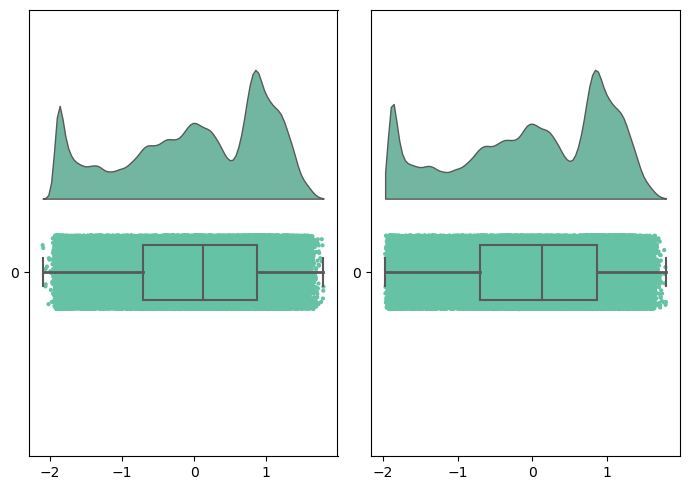

In [132]:
uviz.plot_raincloud_pair(da, 'edem','cop',None)

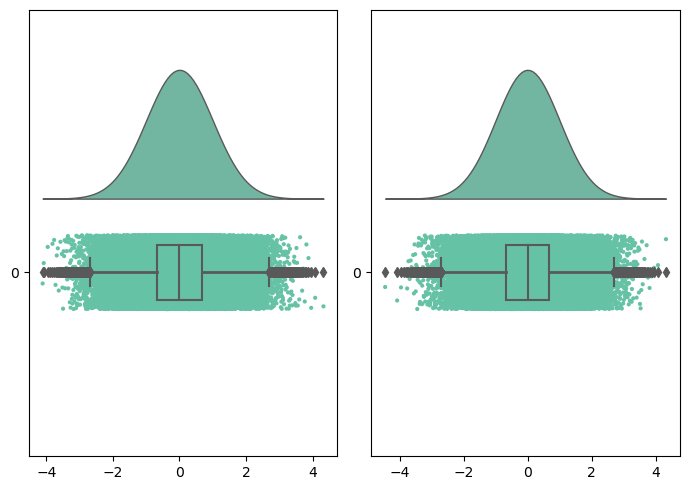

In [133]:
uviz.plot_raincloud_pair(dn,'edem','cop',None)

In [134]:
# affine did not change the distribution of the values, but nscore(@.uw) did

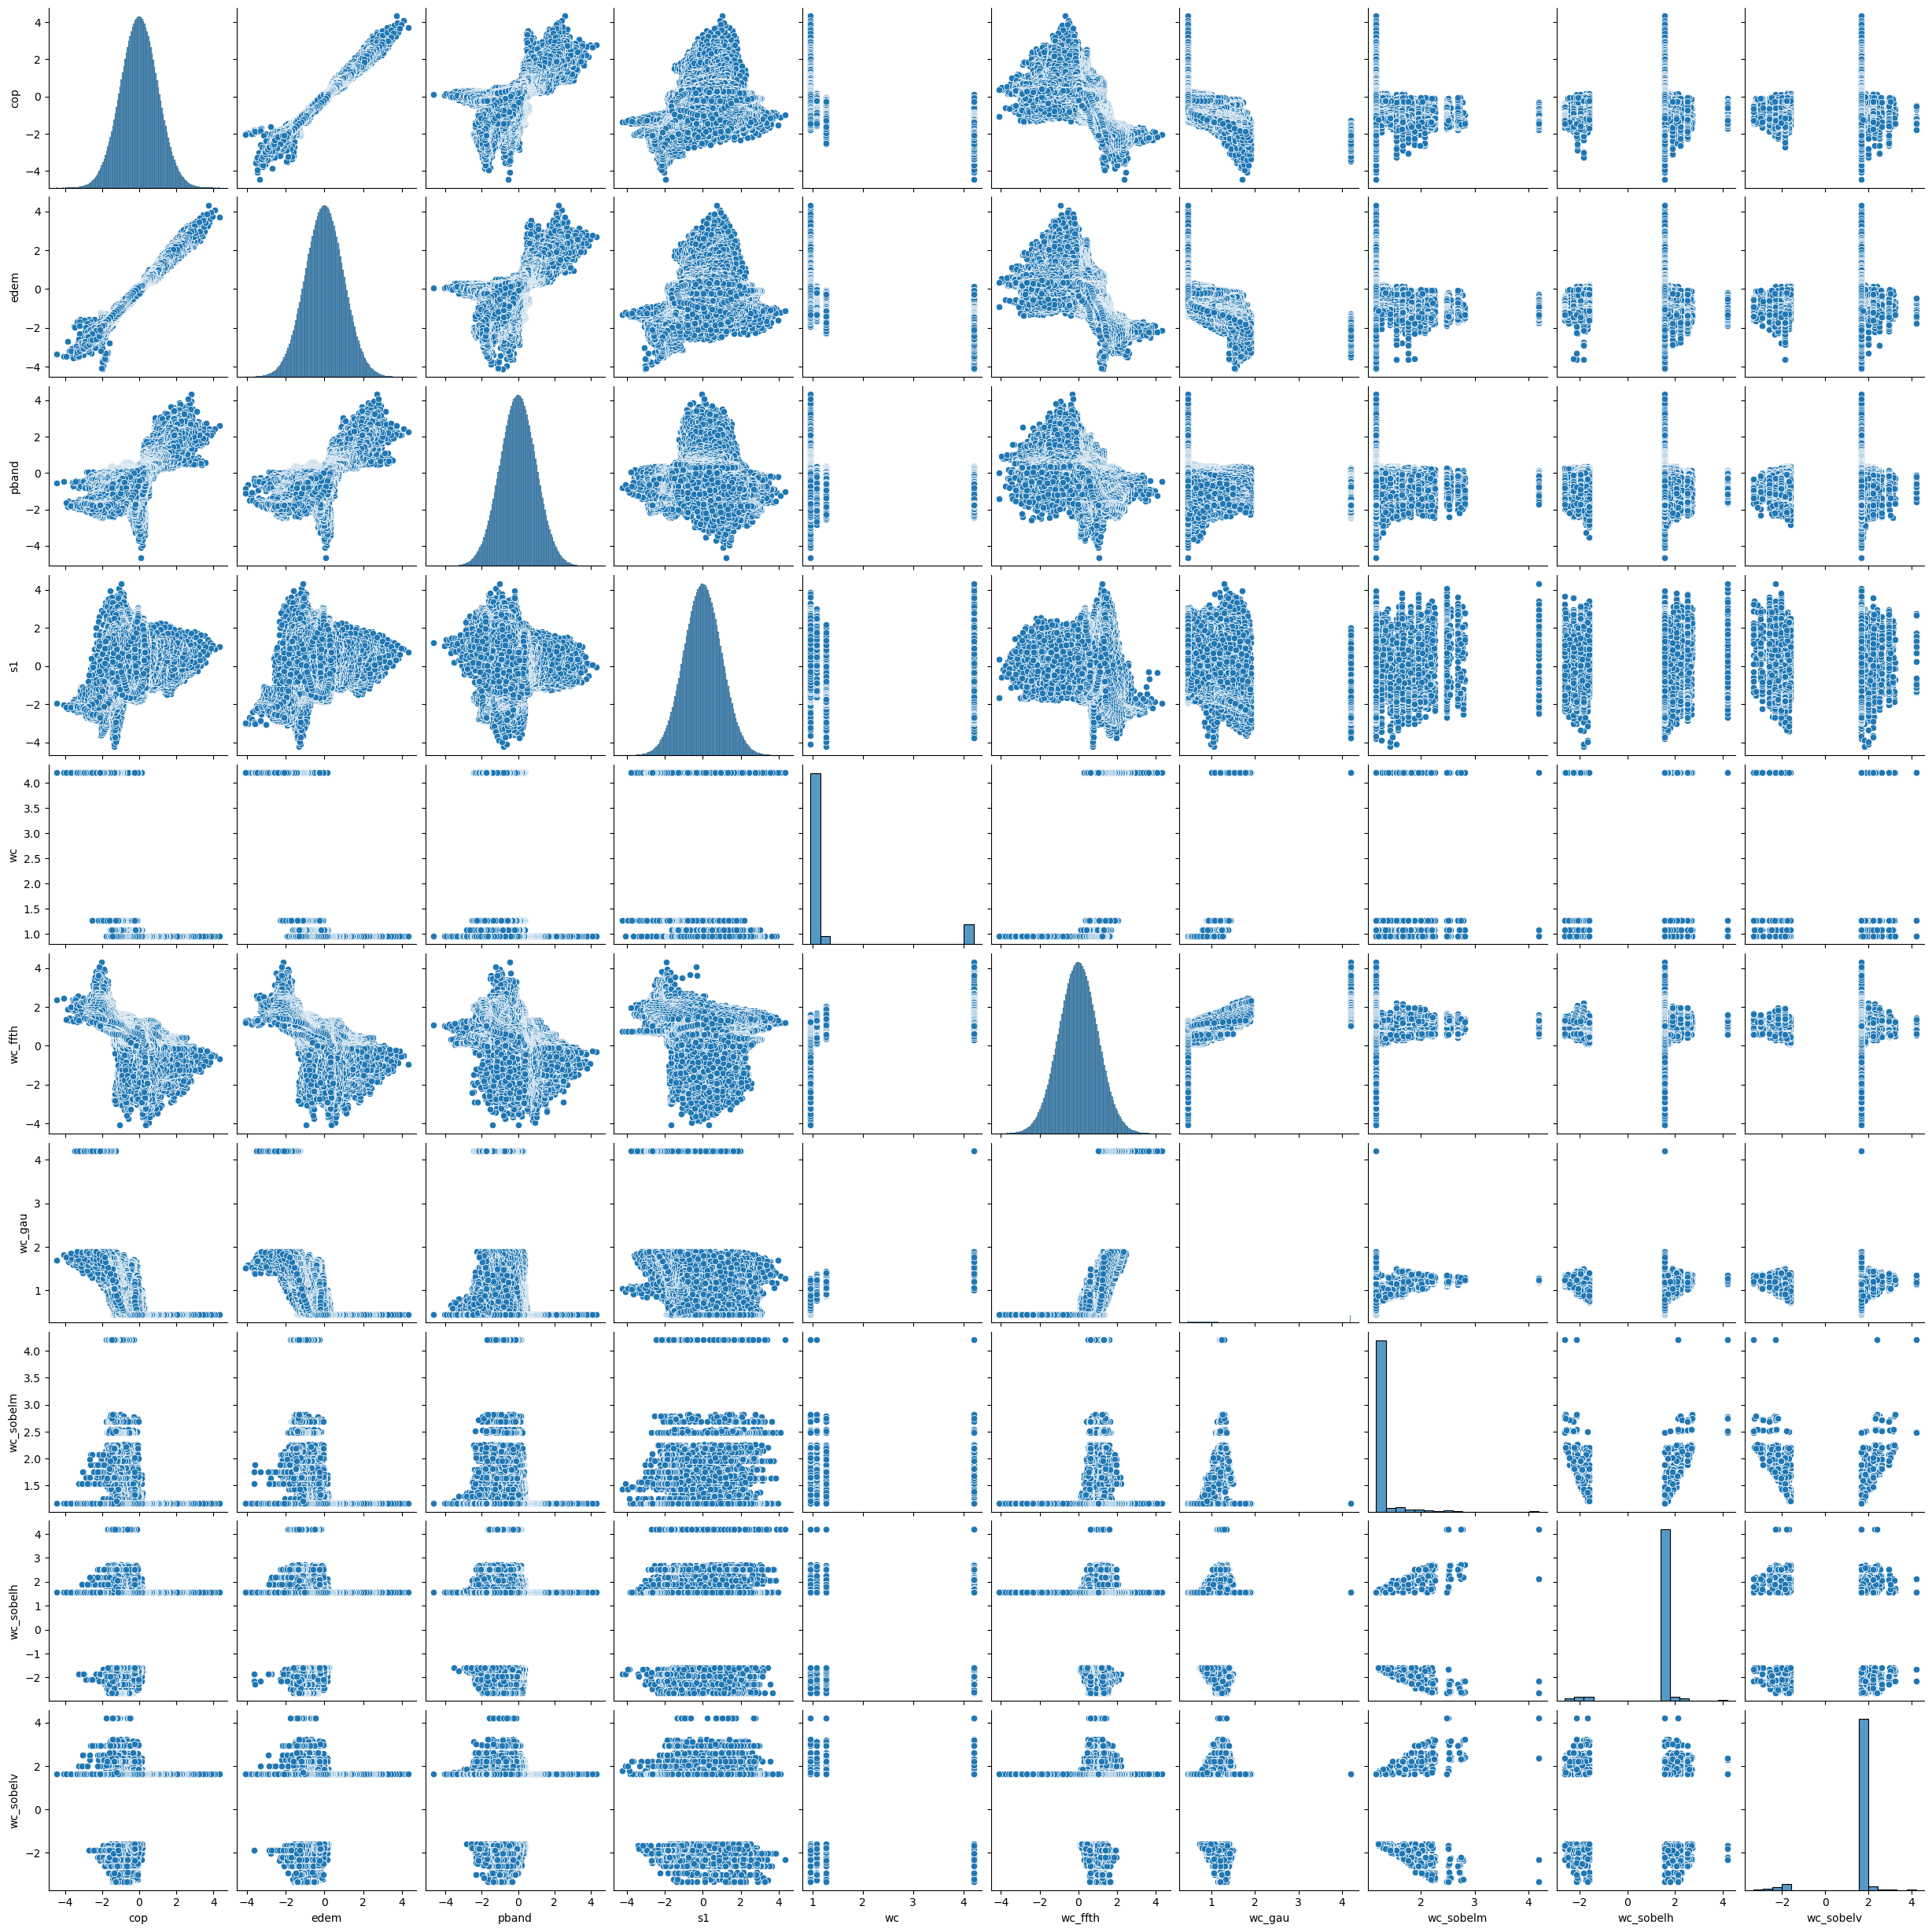

In [135]:
sns.pairplot(dn, vars=fcolx)

In [136]:
# heatmap with spearman correlation and others too ?

In [137]:
print(fcols)
dn = df[fcols]
print(dn.columns.tolist())

['cop', 'edem', 'pband', 's1', 'tdemx', 'wc', 'wc_ffth', 'wc_gau', 'wc_sobelm', 'wc_sobelh', 'wc_sobelv']
['cop', 'edem', 'pband', 's1', 'tdemx', 'wc', 'wc_ffth', 'wc_gau', 'wc_sobelm', 'wc_sobelh', 'wc_sobelv']


In [138]:
def lineplot_ranking(rlist,rname,fcols, num_columns = 2):
    zeros = np.zeros(len(fcols))
    # Set the number of columns for subplots
    # Calculate the number of rows needed
    num_rows = len(rlist) // num_columns
    if len(rlist) % num_columns != 0:
        num_rows += 1

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 8)) #facecolor='lightgray'

    # Flatten the axes array to simplify indexing
    axes = axes.flatten()

    # Iterate through the data and plot each set
    for i, (data, name) in enumerate(zip(rlist, rname)):
        row = i // num_columns
        col = i % num_columns

        # Plot the data
        axes[i].plot(fcols, data, color='black')
        axes[i].plot(zeros, '--', color='red', linewidth=1.0)
        axes[i].grid(True)
        #axes[i].set_xlabel('Predictor Features')
        axes[i].set_ylabel(name)
        #axes[i].set_title(name)
        axes[i].tick_params(axis='x', rotation=45)#90  # Rotate x-axis tick labels by 90 degrees

    # Adjust layout to prevent overlapping subplots
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.5)

    # Show the plot
    plt.show()

In [139]:
## redo ordering of dn so it matches df [x]

r1_cova = dn.corr()
r1_cova = r1_cova.iloc[:,tindex].values

r2_core = dn.corr()
r2_core = r2_core.iloc[:,tindex].values

r3_spearnman_corr, spearnman_pval = stats.spearmanr(dn[fcols])
r3_spearnman_corr, spearnman_pval = r3_spearnman_corr[:,tindex][:], spearnman_pval[:,tindex][:]

r4_partial_corr = ustats.partial_corr(dn[fcols])
r4_partial_corr = r4_partial_corr[:,tindex][:]

r5_semipartial_corr = ustats.semipartial_corr(dn[fcols])
r5_semipartial_corr = r5_semipartial_corr[:,tindex][:]

r6_vif_data = pd.DataFrame()
dependent_variable  = tcolx
independent_variables  = dn[fcols]
r6_vif_data["Variable"]  = fcols
r6_vif_data["VIF"] = [variance_inflation_factor(independent_variables.values, 
                        i) for i in range(independent_variables.shape[1])]
#vif_data = vif_data.sort_values('VIF', ascending=False)
r6_vif = r6_vif_data.VIF.values

zeros = np.zeros(len(fcols))
rlist = [r1_cova, r2_core, r3_spearnman_corr,r4_partial_corr,r5_semipartial_corr,r6_vif]
rname = ['Covariate','Correlation','Spearman','PartialCorr','SemipartialCorr', 'VIF']

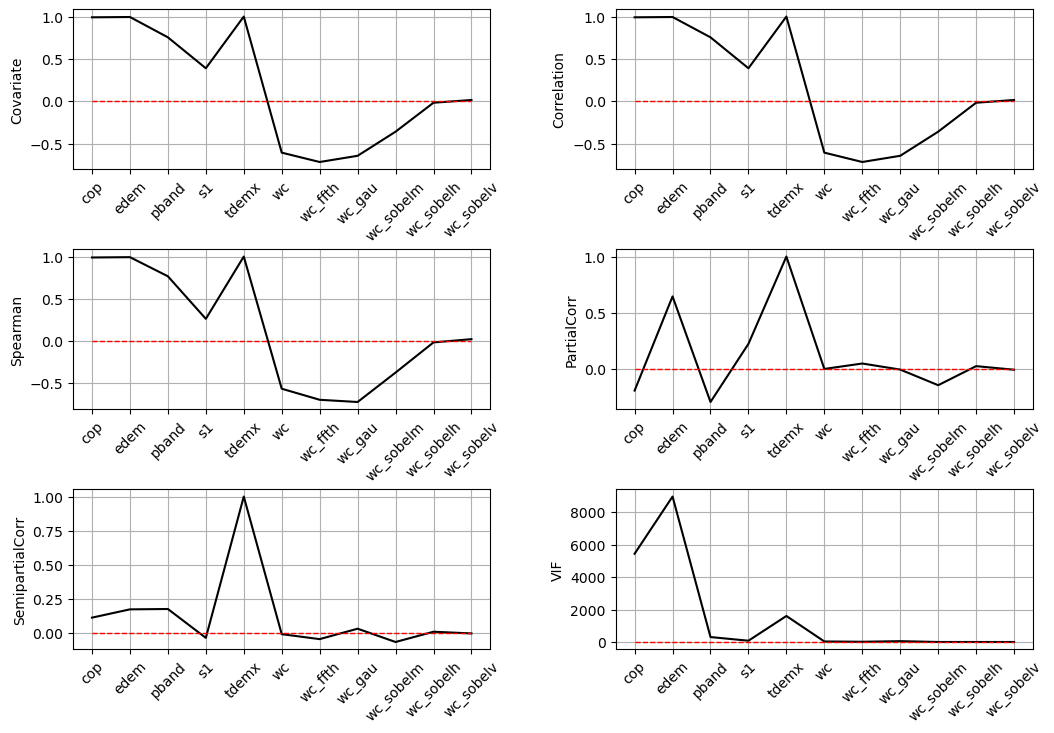

In [140]:
lineplot_ranking(rlist,rname,fcols, num_columns = 2)

In [141]:
# save the plots so we can cmpare side by side scale and unscaled
# there's seem to be no difference 

In [ ]:
# do vif with rf